In [1]:
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
import scipy as sc

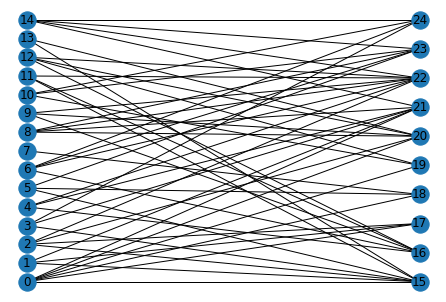

In [2]:
G = nx.bipartite.gnmk_random_graph(15, 10, 50, seed=123)

top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)

nx.draw(G, pos, with_labels=True)

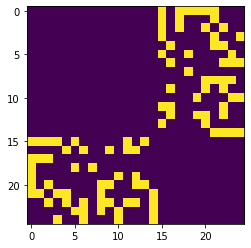

In [3]:
A = nx.adjacency_matrix(G)
A = A.toarray()
plt.imshow(A)

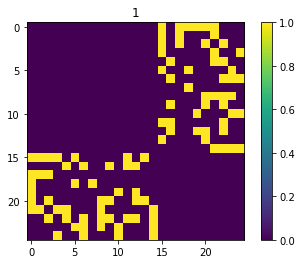

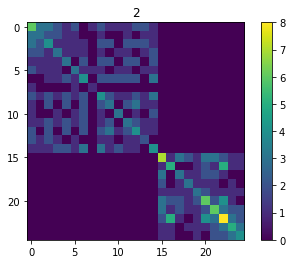

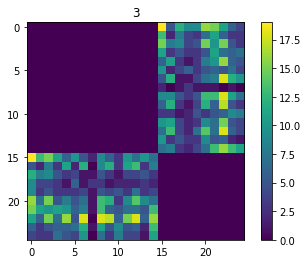

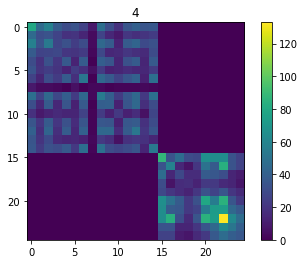

In [4]:
# plot powers
def plot(Ak, k):
    plt.title(k)
    plt.imshow(Ak)
    plt.colorbar()
    plt.show()

for k in range(1, 5):

    # power of adjacency matrix
    Ak = np.linalg.matrix_power(A, k)

    plot(Ak, k)

In [5]:
# diff = np.linalg.matrix_power(A, 3) #- A
# plot(diff, "3-1")
# diff

# KERNEL

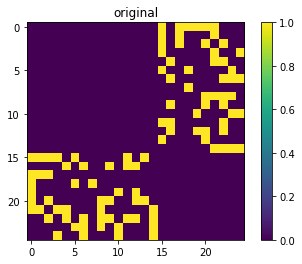

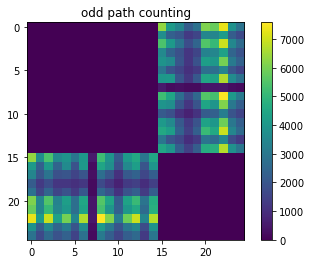

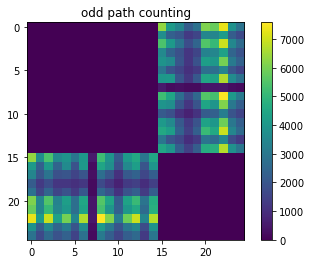

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 6346, 4145, 3443, 2214, 2824, 6103, 5816,
        7315, 3868, 2891], dtype=int64),
 array([  -0.,    0.,    0.,    0.,    0.,   -0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   -0.,    0., 6346., 4145., 3443.,
        2214., 2824., 6103., 5816., 7315., 3868., 2891.]))

In [11]:
"""
PATH COUNTING
"""

# eigenvalue decomposition. Don't use SVD, it doesn't return similar U and U.T
V, U = np.linalg.eig(A)

# transform
V_ = V + V**3 + V**5 + V**7
AOdd_pred = U @ np.diag(V_) @ U.T
AOdd_pred = AOdd_pred.real

# original
AOdd = A + np.linalg.matrix_power(A, 3) + np.linalg.matrix_power(A, 5) + np.linalg.matrix_power(A, 7)

plot(AOdd, "odd path counting")
plot(AOdd_pred, "odd path counting")

AOdd[0], np.round(AOdd_pred[0])


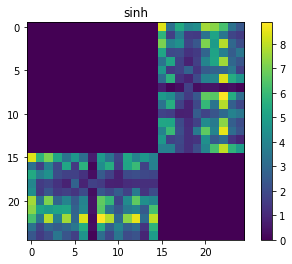

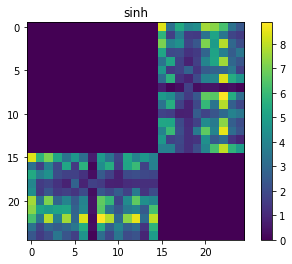

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        8.46351745, 3.29006236, 5.38406246, 4.06808546, 4.37739777,
        7.65827453, 7.29441732, 6.28421881, 3.35880003, 2.40868958]),
 array([-9.77331661e-15, -1.28824804e-17, -2.48003061e-15, -2.24709334e-16,
         4.55693836e-15, -2.00208326e-15,  6.34161470e-15,  1.56048068e-15,
         1.96785470e-15,  5.77519352e-15,  1.53042098e-15,  2.34705798e-15,
         3.10800572e-15, -5.13231519e-15,  4.82045653e-15,  8.46351745e+00,
         3.29006236e+00,  5.38406246e+00,  4.06808546e+00,  4.37739777e+00,
         7.65827453e+00,  7.29441732e+00,  6.28421881e+00,  3.35880003e+00,
         2.40868958e+00]))

In [7]:
"""
HYPERBOLIC SINE PSEUDOKERNEL
"""

# eigenvalue decomposition. Don't use SVD, it doesn't return similar U and U.T
V, U = np.linalg.eig(A)

# transform
V_ = np.array([
    0.5 * (np.exp(lamb) - np.exp(-lamb)) for lamb in V
])
Asinh_pred = U @ np.diag(V_) @ U.T
Asinh_pred = Asinh_pred.real

# original
Asinh = sc.linalg.sinhm(A)

plot(Asinh, "sinh")
plot(Asinh_pred, "sinh")

Asinh[0], Asinh_pred[0]


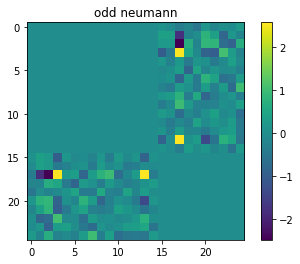

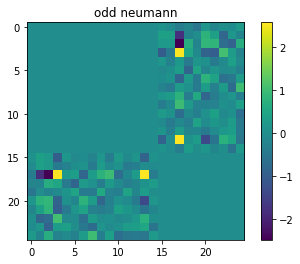

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.09714286, -0.04571429, -0.33714286, -0.17714286, -0.48571429,
         0.16571429, -0.16      ,  0.03428571, -0.02285714,  0.25142857]),
 array([ 5.82090258e-16, -6.96777277e-16,  7.62172556e-16,  6.35980159e-16,
        -7.87025558e-16, -1.09180417e-15,  4.62756310e-16,  7.70789799e-16,
        -7.19341286e-16,  6.43170128e-16,  7.99863125e-17, -8.62755281e-16,
        -3.65222015e-16,  2.89020913e-16,  4.19174381e-16,  9.71428571e-02,
        -4.57142857e-02, -3.37142857e-01, -1.77142857e-01, -4.85714286e-01,
         1.65714286e-01, -1.60000000e-01,  3.42857143e-02, -2.28571429e-02,
         2.51428571e-01]))

In [8]:
"""
ODD NEUMANN PSEUDOKERNEL
"""

# eigenvalue decomposition. Don't use SVD, it doesn't return similar U and U.T
V, U = np.linalg.eig(A)

# transform
V_ = np.array([
    0.5 * (1/(1-lamb) - 1/(1+lamb)) for lamb in V
])
Aneu_pred = U @ np.diag(V_) @ U.T
Aneu_pred = Aneu_pred.real

# original
I = np.eye(A.shape[0])
Aneu = A @ np.linalg.inv(I - A@A)

plot(Aneu, "odd neumann")
plot(Aneu_pred, "odd neumann")

Aneu[0], Aneu_pred[0]


without learning, we can use kernel to propose new links in the network. The problem is these kernels are not normalised between [0, 1]. How to determine the cutoff threshold?

# Link Prediction

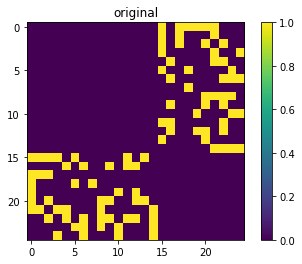

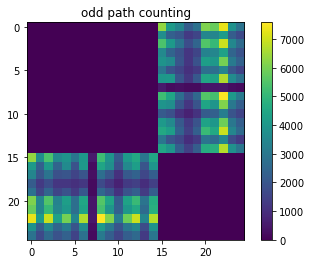

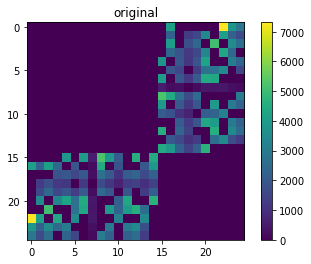

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 6346, 4145, 3443, 2214, 2824, 6103, 5816,
        7315, 3868, 2891], dtype=int64),
 array([  -0.,    0.,    0.,    0.,    0.,   -0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   -0.,    0., 6346., 4145., 3443.,
        2214., 2824., 6103., 5816., 7315., 3868., 2891.]))

In [25]:
"""
PATH COUNTING
"""

# eigenvalue decomposition. Don't use SVD, it doesn't return similar U and U.T
V, U = np.linalg.eig(A)

# transform
V_ = V + V**3 + V**5 + V**7
AOdd_pred = U @ np.diag(V_) @ U.T
AOdd_pred = AOdd_pred.real

# original
AOdd = A + np.linalg.matrix_power(A, 3) + np.linalg.matrix_power(A, 5) + np.linalg.matrix_power(A, 7)

plot(A, "original")
# plot(AOdd, "odd path counting")
plot(AOdd_pred, "odd path counting")
plot((1-A)*(AOdd_pred), "original")

AOdd[0], np.round(AOdd_pred[0])


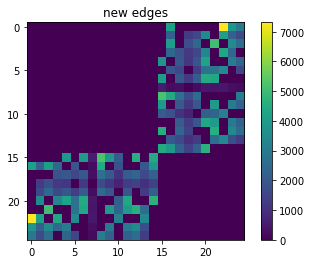

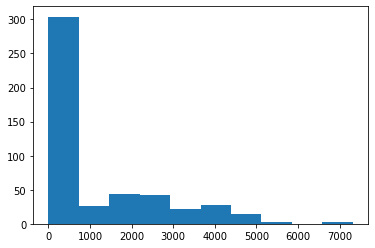

22

In [30]:
proposedA = (1-A)*(AOdd_pred)
plot(proposedA, "new edges")
plt.hist(list(filter(lambda x: x>0, proposedA.flatten())))
plt.show()
np.argmax(proposedA)

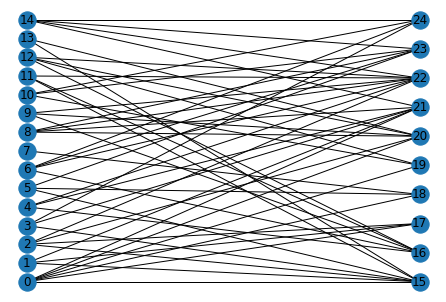

In [28]:
nx.draw(G, pos, with_labels=True)

In [44]:
# basically prove that A^k is the number of unique paths between (i, j) of length k

Gtemp = nx.Graph()
Gtemp.add_nodes_from([0, 1, 2, 3])
Gtemp.add_edges_from([(0, 2), (0, 3), (1, 3)])
Atemp = nx.adjacency_matrix(Gtemp).toarray()

Atemp, Atemp @ Atemp, Atemp @ Atemp @ Atemp

(array([[0, 0, 1, 1],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 1, 0, 0]], dtype=int64),
 array([[2, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2]], dtype=int64),
 array([[0, 0, 2, 3],
        [0, 0, 1, 2],
        [2, 1, 0, 0],
        [3, 2, 0, 0]], dtype=int64))